# **Project 3 : OFDMA - Hugo QUENIAT, Aristide LALOUX**

## Introduction

In [41]:
# Imports

import numpy as np
import math
import random
import matplotlib.pyplot as plt
from scipy import stats

In [40]:
# Parameters

C=200000
W=250000
K=10**6
gamma=2.8
R=300
lambd=0.01
SNRmin = 0.1
p=0.01
Smin = 30
Smax = 100


# Q1)

The users are represented by a Poisson Process of intensity measure $\lambda dx$. We know that only a percentage $p$ of the users are active in a time slot. This means that the process of active customers in a time slot results from the $p$-thinning of a Poisson process of intensity measure $\lambda dx$.

Hence the process of active customers in a time slot $N_{active}$ is a Poisson Process of intensity measure of $p\lambda dx$.

# Q2) 

The cell corresponds to $\mathcal{C}_R$ the observation circle of radius $R$.

Since $N_{active} \sim PPP(p\lambda dx)$,

We have $N_{active}(\mathcal{C}_R) \sim P(p\lambda \pi R^2)$ where $\pi R^2$ is the surface of $\mathcal{C}_R$ for the 2D-Lebesgue measure $dx$.

Since the mean of a Poisson random variable is its intensity, we have $\mathbb{N_{active}} = p\lambda \pi R^2$ 

# Q3)

- For $N_{max}\geq k>1$ we have:

$N(x) = k \Leftrightarrow \lceil \frac{C}{Wlog_2(1+\frac{K}{\mid\mid x \mid\mid^{\gamma}})} \rceil = k$

$\Leftrightarrow k-1 < \frac{C}{Wlog_2(1+\frac{K}{\mid\mid x \mid\mid^{\gamma}})} \leq k $

$\Leftrightarrow \frac{C}{W(k-1)}<log_2(1+\frac{K}{\mid\mid x \mid\mid^{\gamma}}) \leq \frac{C}{Wk} $

$\Leftrightarrow 2^{\frac{C}{W(k-1)}} -1 < \frac{K}{\mid\mid x \mid\mid^{\gamma}} \leq 2^{\frac{C}{Wk}} -1 $ 

$\Leftrightarrow  \frac{K}{2^{\frac{C}{W(k-1)}} -1}< \mid\mid x \mid\mid^{\gamma} \leq \frac{K}{2^{\frac{C}{Wk}} -1} $

$\Leftrightarrow  \sqrt[\gamma]{\frac{K}{2^{\frac{C}{W(k-1)}}} -1}< \mid\mid x \mid\mid \leq \sqrt[\gamma]{\frac{K}{2^{\frac{C}{Wk}} -1}} $

- If k=1, doing the same leads to 

$ 0< \mid\mid x \mid\mid \leq \sqrt[\gamma]{\frac{K}{2^{\frac{C}{W}}} -1}$

By setting: 

$a_0 = 0$ and $\forall k\in[|1,N_{max}|], a_k := \sqrt[\gamma]{\frac{K}{2^{\frac{C}{Wk}} -1}}$, we find that the cell that requires $k$ subcarriers (square) is a crown $\mathcal{C}_k$ (sort of a donut) of center $(0,0)$ and borders $a_{k-1}, a_k$

We can define such "crowns"/"donuts" properly $\forall k\in[|1,N_{max}|]$, $\mathcal{C}_k := \{x \in \mathbb{R^2} \mid a_{k-1} < \mid\mid x \mid\mid \leq a_{k}\}$ 

# Q4)

We have $A_3 = N_{active} (\mathcal{C}_3) \sim \mathcal(P(p\lambda \pi (a_3^2 - a_{2}^2)))$ which is a Poisson random variable of intensity $p\lambda \pi (a_3^2 - a_{2}^2) = p\lambda \pi \cdot ( (\frac{K}{2^{\frac{C}{3W} } -1} )^{\frac{2}{\gamma}} -   (\frac{K}{2^{\frac{C}{2W} }-1 } )^{\frac{2}{\gamma}} )$.

# Q5)

The test of Kolmogorov-Smirnov is test that evaluate the hypothesis according to samples would follow a certain law.

In our case, we can use it to coroborate the theorical result by making simulation: 

- 1) Firstly we draw $N_{active}$ a Poisson random variable of intensity $p \lambda \pi R^2$.

- 2) Then we place uniformely the $N_{active}$ points uniformely on $\mathcal{C}_R$, the circle of center $(0,0)$ and radius $R$

- 3) Count in the numbers of points that are in $\mathcal{C}_3$ and store this int in $N_{simulation}(A_3)$

- 4) Repeat the previous steps to have "enough" values of $N_{simulation}(A_3)$

- 5) Compute the distribution of $N_{simulation}(A_3)$ based on the values we got experimentally

- 6) Use the Kolmogorov-Smirnov test to check the distribution of $N_{simulation}(A_3)$ fits with a Poisson distribution of intensity $p\lambda \pi (a_3^2 - a_{2}^2)$

In [37]:
# Drawing several values of N_A3

num_draw = 100000

# Calculation of a3 and a2, the radiuses of the crown
a3 = (K / (2**(C / (W * 3)) - 1))**(1 / gamma)
a2 = (K / (2**(C / (W * 2)) - 1))**(1 / gamma)

# Calculation of Sc3, the area of the crown
Sc3 = p * math.pi * lambd * (a3**2 - a2**2)

N_A3 = []      # Empty list to store the number of active points within the crown at each draw

# Loop to perform num_draw iterations
for i in range(num_draw):
    N_A3_count = 0
    
    # Drawing a Poisson random variable for the number of active points in the considered area
    N_active = np.random.poisson(p * lambd * math.pi * R**2)
    
    X_points = []   # List to store the X coordinates of the points
    Y_points = []   # List to store the Y coordinates of the points
    Modulus_points = []   # List to store the modulus of the points
    
    # Loop to generate the positions of the active points
    for k in range(N_active):
        r = R * math.sqrt(random.random())   # Calculation of a random value for the radius
        theta = random.random() * 2 * math.pi   # Calculation of a random value for argument
        X_points.append(r * math.cos(theta))   # Adding the X coordinate of the point
        Y_points.append(r * math.sin(theta))   # Adding the Y coordinate of the point
        Modulus_points.append(r)   # Adding the modulus of the point
        
    
    X_crown_points = []   # List to store the X coordinates of the points in the crown
    Y_crown_points = []   # List to store the Y coordinates of the points in the crown
    
    # Loop to check if the generated points are in the crown
    for j in range(len(X_points)):
        r = Modulus_points[j]   # Modulus of the point
        if r <= a3:
            if r > a2:
                N_A3_count = N_A3_count + 1   # Increment the N_A3_count counter
    
    N_A3.append(N_A3_count)   # Add the N_A3_count result to the N_A3 list

print(N_A3)   # Print the results of N_A3


[5, 8, 9, 1, 6, 5, 6, 3, 8, 3, 3, 6, 1, 2, 7, 7, 8, 4, 4, 7, 5, 6, 3, 4, 3, 8, 4, 5, 4, 5, 5, 8, 5, 4, 2, 7, 3, 6, 3, 3, 7, 12, 4, 6, 9, 5, 8, 5, 4, 5, 8, 7, 7, 6, 6, 8, 4, 3, 4, 3, 3, 4, 6, 1, 4, 4, 5, 8, 5, 3, 6, 3, 2, 2, 7, 7, 4, 10, 7, 5, 8, 3, 6, 4, 5, 5, 4, 6, 7, 6, 3, 8, 5, 3, 4, 4, 3, 9, 3, 6, 8, 5, 4, 3, 3, 6, 10, 4, 3, 3, 5, 2, 7, 6, 6, 6, 5, 4, 3, 2, 5, 3, 3, 2, 8, 8, 3, 3, 5, 7, 7, 3, 6, 7, 7, 5, 3, 3, 7, 4, 4, 3, 2, 9, 5, 4, 4, 13, 4, 5, 8, 5, 5, 8, 5, 6, 9, 3, 6, 6, 7, 5, 10, 6, 3, 4, 5, 6, 4, 5, 4, 5, 7, 1, 4, 7, 5, 5, 6, 8, 3, 2, 5, 8, 4, 6, 6, 6, 6, 10, 1, 1, 2, 6, 3, 5, 2, 5, 4, 4, 6, 4, 1, 2, 2, 3, 3, 6, 8, 7, 4, 7, 7, 9, 1, 3, 7, 6, 3, 7, 10, 7, 2, 3, 8, 5, 4, 5, 9, 6, 4, 4, 8, 5, 7, 5, 5, 1, 6, 10, 5, 3, 5, 5, 2, 5, 7, 6, 7, 6, 7, 7, 10, 5, 4, 5, 3, 3, 4, 4, 4, 3, 6, 4, 5, 9, 5, 4, 2, 3, 5, 5, 6, 5, 4, 5, 3, 6, 10, 6, 5, 6, 3, 5, 6, 4, 7, 5, 7, 4, 7, 6, 1, 5, 7, 7, 4, 5, 1, 7, 7, 3, 4, 5, 4, 0, 3, 5, 6, 3, 5, 7, 4, 0, 3, 2, 2, 2, 3, 8, 6, 8, 4, 2, 8, 6, 4, 2, 4, 7,

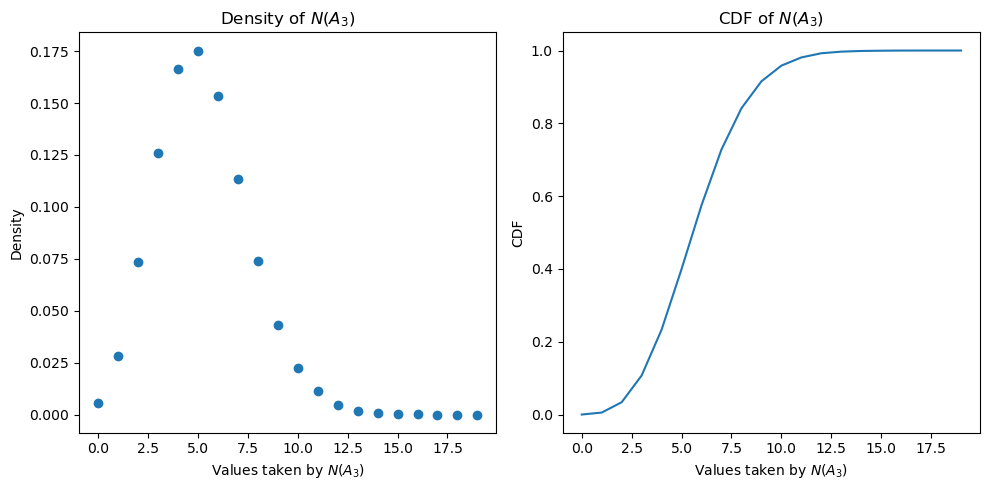

In [39]:
# Plotting the density and CDF of N_A3

x_axis = [k for k in range(max(N_A3)+1)]  # Values taken by N_A3
density = np.zeros(max(N_A3)+1)  # Density of N_A3, computed as the frequency of each value taken by N_A3

# Calculate the frequency of each value taken by N_A3
for x in N_A3:
    density[x] += 1

density = density / np.sum(density)  # Normalize the density to obtain probabilities

cdf = [np.sum(density[:k]) for k in range(len(density))]  # Calculate the cumulative distribution function (CDF)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the density of N(A3)
axes[0].scatter(x_axis, density)
axes[0].set_xlabel(r'Values taken by $N(A_3)$')
axes[0].set_ylabel('Density')
axes[0].set_title(r'Density of $N(A_3)$')

# Plot the CDF of N(A3)
axes[1].plot(x_axis, cdf)
axes[1].set_xlabel(r'Values taken by $N(A_3)$')
axes[1].set_ylabel('CDF')
axes[1].set_title(r'CDF of $N(A_3)$')

plt.tight_layout()
plt.show()


0.1
0.9999923931635496


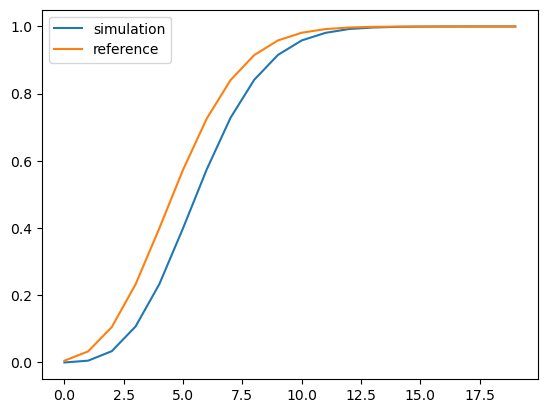

In [42]:
# Kolmogorov-Smirnov test

# Generate a Poisson distribution with the same parameters as N(A3)
poisson_dist = stats.poisson(mu=p*lambd*np.pi*(a3**2-a2**2))

# Plot the CDF of N(A3) and the CDF of the Poisson distribution
plt.plot(abs, cdf, label="simulation" )

temp = [poisson_dist.cdf(k) for k in abs]
plt.plot(abs, temp, label="reference")
plt.legend()

# Perform the Kolmogorov-Smirnov test
D, p_value = stats.kstest(cdf, temp)
print(D)
print(p_value)

## Q6)

We have $$F(\phi) = \sum_{x \in \phi} N(x)$$

And we know that $N(x) \in [1,N_{max}]$.

Thus, $$F(\phi) = \sum _{k=1}^{N_{max}} k \cdot \# \{x \in \phi \mid N(x) = k\}$$

Then, we can use question 3)

$\forall k, \# \{x \in \phi \mid N(x) = k\} = N_{active}(C_k) \sim \mathcal(P(p\lambda \pi (a_k^2 - a_{k-1}^2)))$

Finally, we have $$F(\phi) = \sum _{k=1}^{N_{max}} k \zeta_k$$

where $\zeta_k$ are independant Poisson rv of intensity $p\lambda \pi (a_k^2 - a_{k-1}^2)$

The independancy comes from the fact that the "crown surface" are disjoint.

## Q7)

First, let's compute $\mathbb{E}(e^{\theta X_{\mu}})$ by Transfer Theorem:

$$\mathbb{E}(e^{\theta X_{\mu}}) = \sum_{k=0}^{+\infty} \frac{{e^{\theta}}^k \mu^k}{k!} e^{- \mu} = e^{- \mu + \mu e^{\theta}}$$

Thus, we are trying to find $$\min_{\theta > 0} e^{- \mu + \mu e^{\theta} - K_{\mu} \theta} = \min_{\theta > 0} e^{f(\theta)}$$

The exponential being an increasing function, we can equivalently minimize $f(\theta)$.

We have $$f'(\theta) = \mu e^{\theta} - K_{\mu}$$

$$f'(\theta) = 0 \Leftrightarrow \mu e^{\theta} = K_{\mu} \Leftrightarrow \theta = \ln(\frac{K_{\mu}}{\mu})$$

Finally, we have $$\min_{\theta > 0} e^{f(\theta)} = e^{f(\ln(\frac{K_{\mu}}{\mu}))} = e^{-\mu + K_{\mu} - K_{\mu} \ln(\frac{K_{\mu}}{\mu})}$$

## Q8)

Using the given inequality : $$ \mathbb{P}(X_{\mu} \geq K_\mu) \leq \frac{\mathbb{E}(e^{\theta X_{\mu}})}{e^{\theta K_\mu}}$$

We have that $$ \mathbb{P}(X_{\mu} \geq K_\mu) \leq e^{- \mu + K_{\mu} - K_{\mu} \ln(\frac{K_{\mu}}{\mu})}$$

It is then sufficient to find $K_{\mu}$ such that $$e^{-\mu + K_{\mu} - K_{\mu} \ln(\frac{K_{\mu}}{\mu})} \leq 10^{-4} \Leftrightarrow K_{\mu}(1-  \ln(\frac{K_{\mu}}{\mu})) \leq \mu -4 \ln(10)$$

Let $f(x) = x(1-ln(\frac{x}{\mu}))$ 

Since $f$ is continuous, and $f(\mu)=0$ and $lim_{x\rightarrow{+\infty}} f(x) = -\infty$, we know that as long as $-4 \ln(10) < 0$ which is the case in this project, $\exists K_{\mu}$ such that $K_{\mu}(1-  \ln(\frac{K_{\mu}}{\mu})) \leq \mu -4 \ln(10)$




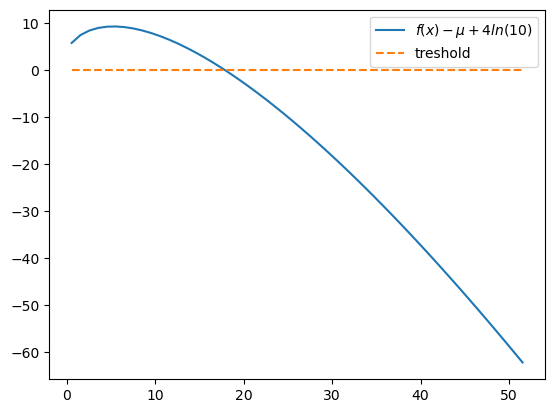

In [54]:
# Calculation of such K_\mu

# Compute the value of mu, the parameter of the Poisson distribution
mu = p*lambd*np.pi*(a3**2-a2**2)

# Function f that we want to bring to zero
def f(x):
    return( x*(1-np.log(x/mu))-mu + 4*np.log(10))

x = np.arange(mu/10, 10*mu)
y = [f(u) for u in x]
plt.plot(x,y, label=r"$f(x) - \mu +4ln(10)$")
plt.plot(x, [0]*len(x), '--',label="treshold")
plt.legend()

In [44]:
def getKmuTreshold(mu, treshold = 10**(-4) ):
    
    def f(x):
        return( x*(1-np.log(x/mu))-mu + 4*np.log(10))
    
    x = mu
    while f(x) >= 0:
        x = x+1
    return(x)


# Q9)

In [56]:
# Calculation of N_max

Nmax = int (np.ceil(C / (W * np.log2(1+ SNRmin))))

print('Nmax = ', Nmax)
print('We will use ', Nmax, ' subcarriers')


Nmax =  6
We will use  6  subcarriers


For a Poisson random variable, its mean value is its parameter :

$$ X \sim \mathcal{P}(\lambda) \rightarrow \mathbb{E}(X) = \lambda$$

Thus to determine the mean values of the random variables $\zeta_k$, we need to compute their parameters.

In [59]:
# Computing the means

# Begin by computing all the inner and outer radius of the crowns
a_list = [0] # storage for the radiuses

for k in range(1,Nmax+1):
    a_list.append( (K / (2**(C/(W*k)) -1 ) )**(1/gamma))

# Storage for the parameters
zeta_k_mean = []

# Compute the mean of the Poisson distribution for each crown
for k in range(1,Nmax+1):
    mu = p*math.pi*lambd*(a_list[k]**2-a_list[k-1]**2)
    zeta_k_mean.append(mu)

print('List of the radiuses of the crowns :', a_list)
print('List of the means of the Poisson distributions :', zeta_k_mean)

List of the radiuses of the crowns : [0, 154.64271782783575, 208.84688136632312, 245.56182843686716, 274.4492727197305, 298.72235069353735, 319.8928217281769]
List of the means of the Poisson distributions : [7.512920966385438, 6.189769948861469, 5.241304921074712, 4.719235048344722, 4.370784606875389, 4.114347419853829]


In [60]:
# Compute the size of the distribution vectors

Kmu_list = []

for k in range(Nmax):
    Kmu_list.append(getKmuTreshold(zeta_k_mean[k]))

Kmu = int(np.ceil(max(Kmu_list)))

print('The supremum of these Kmu is :', Kmu)

The supremum of these Kmu is : 23


### Check: Verification that we have for each $\zeta_k : P(\zeta_k > K^*) < 10^{-4}$

In [65]:
# Checking that our supremum is correct

flag = True
for k in range(Nmax):

    mu_k = zeta_k_mean[k]
    poisson_dist = stats.poisson(mu=mu_k)
    
    if 1-poisson_dist.cdf(Kmu) >= 10**(-4):
        flag = False
        break
    
print('The supremum is correct :', flag)

The supremum is correct : True


In [68]:
# Construct the vectors, meaning compute the distributions

# The values reachable by the distributions from 0 to Kmu
possible_values = [i for i in range(Kmu+1)]

# Storage for the distributions
zeta_distributions = np.zeros((Nmax,Kmu+1))

# Loop over the variables
for k in range(Nmax):
    mu = zeta_k_mean[k]
    fact = 1
    
    # Loop over their image set
    for i in range(Kmu+1):
        zeta_distributions[k][i] = np.exp(-mu) * mu**i / fact
        fact = fact * (i+1)

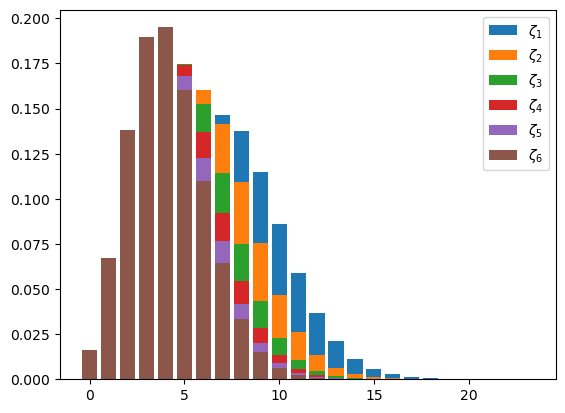

In [69]:
# Plot the distributions

for k in range(Nmax): 
    plt.bar(possible_values, zeta_distributions[k], label=r'$\zeta_{' + f'{k+1}' + '}$')
plt.legend()

As we can see we have represented the distribution by only using vectors of length $K^*$

Now, we want to compute the distributions of the random variables $k \zeta_k$. Thos random variables are still valued in $\mathbb{N}$ and their distribution is given by:

$$\forall i \notin k \mathbb{Z},\textbf{   } \mathbb{P}( k \zeta_k = i) = 0$$

$$\forall i \in k \mathbb{N}^*, \textbf{   }\mathbb{P}( k \zeta_k = i) = \mathbb{P}( \zeta_k = \frac{i}{k}) = e^{-\mu} \mu^{i/k} \frac{1}{(i/k)!}$$

In [73]:
# Compute the distributions for the k zeta_k random variables

# New size of the distributions because of the rescaling
Kmu2 = (Kmu+1) * Nmax

# New possible values
kabs = [i for i in range(Kmu2+1)]

# Storage for the distributions
kzeta_distributions = np.zeros((Nmax, Kmu2+1))

# Loop over the variables
for k in range(1,Nmax+1):
    mu = zeta_k_mean[k-1]
    # Loop over their image set
    for i in range(Kmu2+1):
        kzeta_distributions[k-1][i] = (i%k ==0) * np.exp(-mu) * mu**(i/k) / math.factorial(int(i/k))

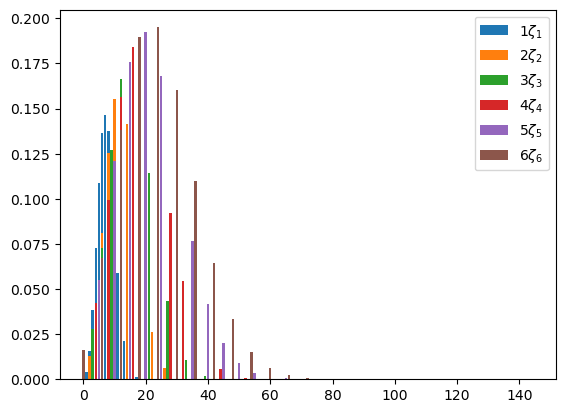

In [74]:
# Plot the distributions

for k in range(Nmax): 
    plt.bar(kabs, kzeta_distributions[k], label= f'{k+1}' + r'$\zeta_{' + f'{k+1}' + '}$')
plt.legend()

For two independant random variables valued in $\mathbb{N}$, thanks to the Formula of Total Probabilities, we have:

$$\mathbb{P}(X+Y = j) = \sum_{i=0}^{j} \mathbb{P}(X = i \cap Y = j-i) = \sum_{k=0}^{n} \mathbb{P}(X = i) \mathbb{P}(Y = j-i)$$

Hence,
$$ \mathbb{P}(X+Y = n) = (\mathbb{P}_X * \mathbb{P}_Y)(n)$$

We then extrapolate easily to any finite sum of independant random variables valued in $\mathbb{N}$ to compute the distribution of the random variable $F(\phi)$.

In [75]:
# Compute the distribution of the sum of the k zeta_k random variables

F_distribution = kzeta_distributions[0]

for k in range(1,Nmax):
    zeta = np.asarray(kzeta_distributions[k])
    F_distribution = np.convolve(F_distribution, zeta)

print(F_distribution)


[1.09180074e-014 8.20261269e-014 3.75707859e-013 1.33659433e-012
 4.04717209e-012 1.09294218e-011 2.70641393e-011 6.25336781e-011
 1.36448535e-010 2.83619483e-010 5.65290278e-010 1.08593380e-009
 2.01888513e-009 3.64455207e-009 6.40619717e-009 1.09897520e-008
 1.84359143e-008 3.02948320e-008 4.88360150e-008 7.73286895e-008
 1.20410593e-007 1.84566045e-007 2.78736980e-007 4.15093298e-007
 6.09991177e-007 8.85149786e-007 1.26907776e-006 1.79878067e-006
 2.52177943e-006 3.49846638e-006 4.80482128e-006 6.53550248e-006
 8.80731975e-006 1.17630842e-005 1.55758168e-005 2.04532833e-005
 2.66428033e-005 3.44362654e-005 4.41752581e-005 5.62562079e-005
 7.11353932e-005 8.93336860e-005 1.11440854e-004 1.38119243e-004
 1.70106643e-004 2.08218144e-004 2.53346778e-004 3.06462744e-004
 3.68611038e-004 4.40907321e-004 5.24531864e-004 6.20721477e-004
 7.30759335e-004 8.55962667e-004 9.97668340e-004 1.15721639e-003
 1.33593164e-003 1.53510359e-003 1.75596478e-003 1.99966804e-003
 2.26726278e-003 2.559670

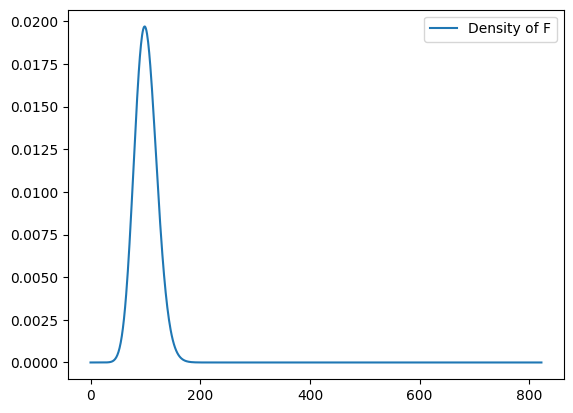

In [58]:
absF = [i for i in range(len(F_distribution))]
plt.plot(absF, F_distribution, label="Density of F")
plt.legend()

In [59]:
sum = 0
for k in range(len(absF), 1, -1):
    sum = sum + F_distribution[i]
    if sum > 0.01:
        print("S =", i)
        break

S = 152
